In [1]:
%cd ~/NetBeansProjects/ExpLosion/
%load_ext autoreload
from notebooks.common_imports import *
from gui.output_utils import *

/Volumes/LocalDataHD/m/mm/mmb28/NetBeansProjects/ExpLosion


# labelled size and domain- w2v @ gigaw 100 vs wiki 15 vs wiki 100

In [2]:
s = {'document_features_ev': 'J+N+V+SVO',
    'document_features_tr': 'J+N+V',
    'expansions__allow_overlap': 1, # todo don't like this
    'expansions__decode_handler': 'SignifiedOnlyFeatureHandler',
    'expansions__entries_of_id': None,
    'expansions__k': 3,
    'expansions__neighbour_strategy': 'linear',
    'expansions__noise': 0.0,
    'expansions__use_random_neighbours': 0,
    'expansions__use_similarity': 0,
#      todo add LDA, turian below
    'expansions__vectors__algorithm__in': ['word2vec'],
    'expansions__vectors__composer__in': ['Verb', 'CopyObj', 'Add', 'Mult', 'Left', 'Right'], 
#          'expansions__vectors__composer__in': ['Mult'], 
    'expansions__vectors__dimensionality': 100,
    'expansions__vectors__rep': 0,
#     'expansions__vectors__unlabelled': 'gigaw',
    'expansions__vectors__unlabelled_percentage__in': [15, 100],
    'expansions__vectors__use_ppmi': 0,
    'labelled': 'amazon_grouped-tagged'}
ids = Experiment.objects.filter(**s).values_list('id', flat=True)
print(ids, 'total', len(ids))

[184, 194, 196, 210, 220, 222, 240, 250, 252, 261, 262, 263] total 12


unlab has 6000 values
percent has 6000 values
folds has 6000 values
Composer has 6000 values
algo has 6000 values
Accuracy has 6000 values
/mnt/lustre/scratch/inf/mmb28/FeatureExtractionToolkit/word2vec_vectors/composed/AN_NN_word2vec-gigaw_100percent-rep0_Add.events.filtered.strings
/mnt/lustre/scratch/inf/mmb28/FeatureExtractionToolkit/word2vec_vectors/composed/AN_NN_word2vec-wiki_100percent-rep0_Add.events.filtered.strings
/mnt/lustre/scratch/inf/mmb28/FeatureExtractionToolkit/word2vec_vectors/composed/AN_NN_word2vec-wiki_15percent-rep0_Add.events.filtered.strings
/mnt/lustre/scratch/inf/mmb28/FeatureExtractionToolkit/word2vec_vectors/composed/AN_NN_word2vec-gigaw_100percent-rep0_Mult.events.filtered.strings
/mnt/lustre/scratch/inf/mmb28/FeatureExtractionToolkit/word2vec_vectors/composed/AN_NN_word2vec-wiki_100percent-rep0_Mult.events.filtered.strings
/mnt/lustre/scratch/inf/mmb28/FeatureExtractionToolkit/word2vec_vectors/composed/AN_NN_word2vec-wiki_15percent-rep0_Mult.events.filte

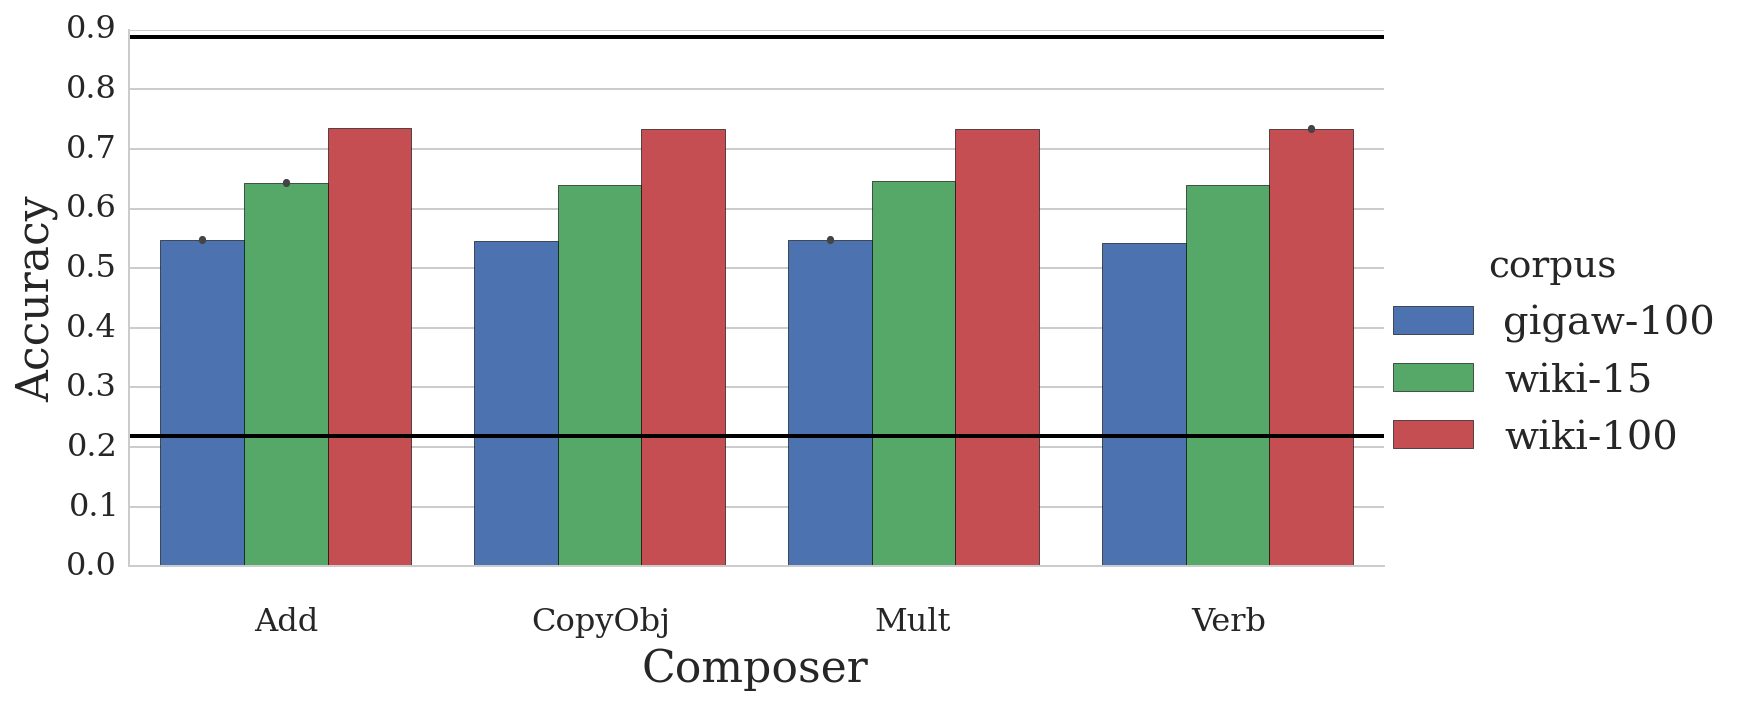

In [3]:
fields = {  'unlab': 'expansions__vectors__unlabelled',
            'algo': 'expansions__vectors__algorithm',
            'Composer': 'expansions__vectors__composer',
             'percent': 'expansions__vectors__unlabelled_percentage'}
df = dataframe_from_exp_ids(ids, fields)
df['corpus'] = ['%s-%s'%(a,b) for a,b in zip(df.unlab, df.percent)]
df.drop(['unlab', 'percent'], axis=1, inplace=True)

g= sns.factorplot(y='Accuracy', x='Composer', hue='corpus',# col='unlab', 
                  hue_order=sort_df_by(df, 'corpus'), aspect=2,
                   data=df, kind='bar');

for ax in g.axes.flat:
    ax.axhline(random_vect_baseline(), c='k');
    ax.axhline(nondistributional_baseline(**settings_of(ids[0])), c='k')

plt.savefig('plot-vps-corpus-size.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

for i in ids:
    print(Experiment.objects.get(id=i).expansions.vectors.path)

# w2v vs glove vs count @ wiki 100

[181, 183, 194, 207, 209, 220, 237, 239, 250, 260, 263, 264] total 12
folds has 6000 values
algo has 6000 values
Accuracy has 6000 values
Composer has 6000 values


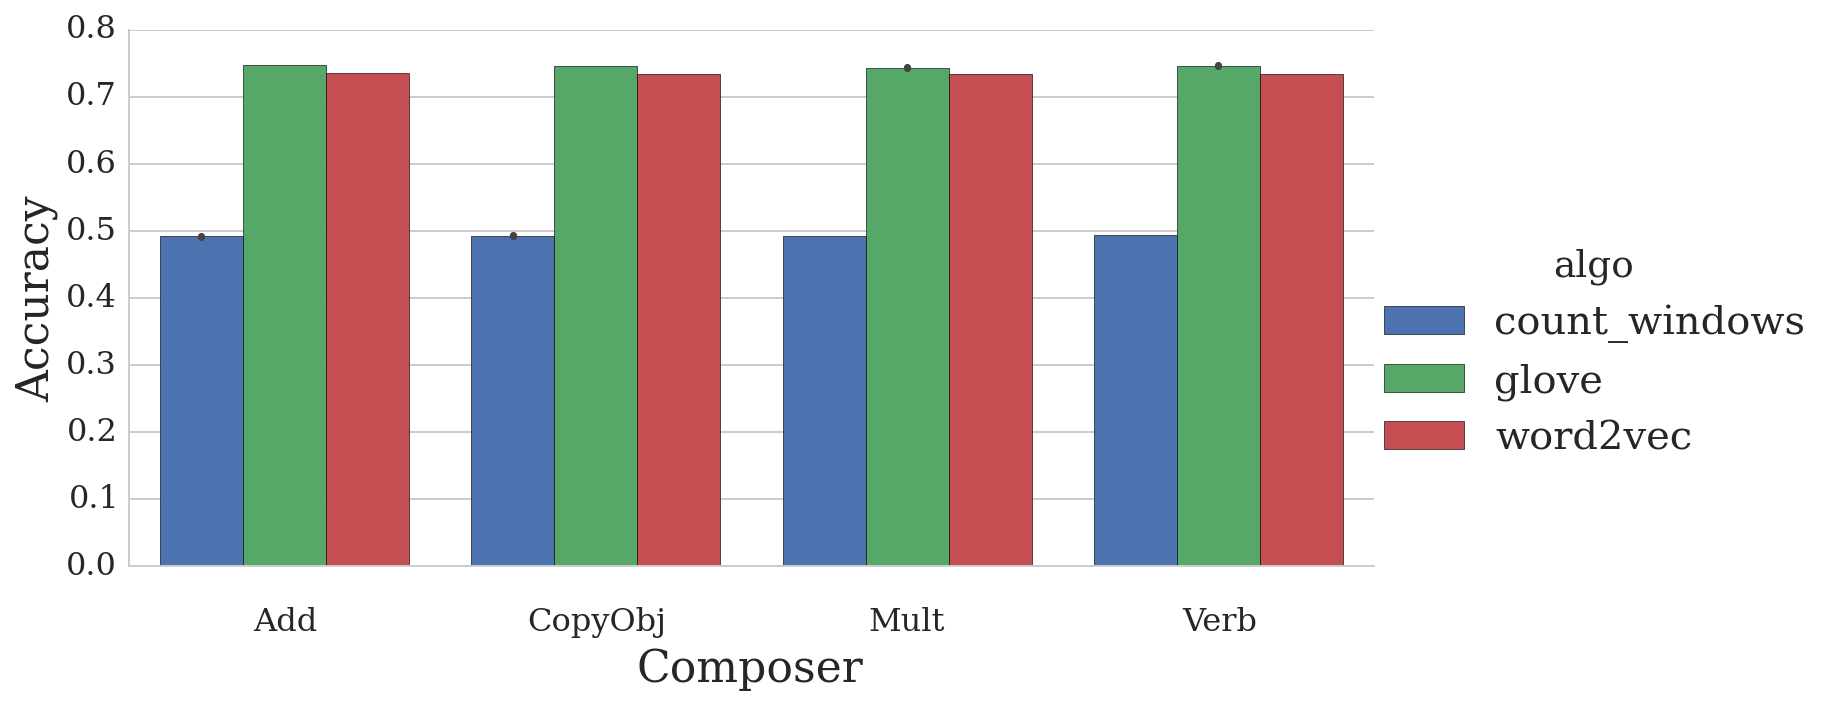

In [4]:
s ['expansions__vectors__algorithm__in'] = ['word2vec', 'glove', 'count_windows']
s['expansions__vectors__composer__in'] = ['Verb', 'CopyObj', 'Add', 'Mult', 'Left', 'Right']
s['expansions__vectors__unlabelled'] = 'wiki'
s['expansions__vectors__unlabelled_percentage__in'] = [100]
ids = Experiment.objects.filter(**s).values_list('id', flat=True)
print(ids, 'total', len(ids))

fields = {#  'unlab': 'expansions__vectors__unlabelled',
           'algo': 'expansions__vectors__algorithm',
            'Composer': 'expansions__vectors__composer',
#              'percent': 'expansions__vectors__unlabelled_percentage'
}
df = dataframe_from_exp_ids(ids, fields, abbreviate=False)
# df['corpus'] = ['%s-%s'%(a,b) for a,b in zip(df.unlab, df.percent)]
# df.drop(['unlab', 'percent'], axis=1, inplace=True)

g= sns.factorplot(y='Accuracy', x='Composer', 
                  hue='algo',# col='unlab', 
#                   hue_order=sort_df_by(df, 'corpus'), aspect=2,
                   data=df, kind='bar', aspect=2);
plt.savefig('plot-vps-algorithm.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)